In [1]:
## initializing necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Basics of Tensorflow

Graphs are constructed with nested mathematical/programmatic operations, usually starting with some sort of constant value as an input.

Commands:
* tf.constant() - Specifies a constant value
* tf.add() - Adds inputted values
* tf.subtract() - Subtracts inputted values, in sequence provided
* tf.multiply() - Multiplys inputted values
* tf.divide() Divides inputted values, as (numerator, denominator)

In [2]:
input_value_one = tf.constant(42)
input_value_two = tf.constant(12)

In [3]:
multiply_inputs = tf.multiply(input_value_one, input_value_two)

To 'run' a graph you need to create a session object, and feed the graph to the session.

In [4]:
sess = tf.Session()

In [5]:
output_value = sess.run(multiply_inputs)

In [6]:
print(output_value)

504


### Importing data into TenworFlow
Placeholders give you a flexible way to bring data into a TensorFlow graph.

* tf.placeholder() - Make sure the input is a Numpy array. Also it's *strongly* recommended to set the 'dtype' kwarg to tf.float32

Placeholders need a 'feed dictionary' fed to the session to function properly, which is just a dictionary with the key being the placeholder object, and the value being what value(s) the placeholder will have for that run of the session.

Placeholders need some kind of shape definition, but you can leave some of the dimensions of an undefined length.

In [7]:
## Importing working data
dataset = pd.read_csv('test_data//minerals_verge_market.csv')
working_data = dataset.loc[dataset['type_name'] == 'Tritanium', ['record_date', 'avg_price']]
working_data = working_data.join(
    working_data['avg_price'].shift(1),
    rsuffix = '_prior'
)
working_data = working_data.loc[np.all(pd.notnull(working_data), axis = 1), :]
print(working_data)
feature_cols = ['avg_price_prior']
label_cols = ['avg_price']

    record_date  avg_price  avg_price_prior
1    2015-04-02       5.75             5.71
2    2015-04-03       5.24             5.75
3    2015-04-04       5.74             5.24
4    2015-04-05       5.74             5.74
5    2015-04-06       5.64             5.74
6    2015-04-07       5.66             5.64
7    2015-04-08       5.64             5.66
8    2015-04-09       5.72             5.64
9    2015-04-10       5.48             5.72
10   2015-04-11       5.60             5.48
11   2015-04-12       5.51             5.60
12   2015-04-13       5.50             5.51
13   2015-04-14       5.49             5.50
14   2015-04-15       5.47             5.49
15   2015-04-16       5.46             5.47
16   2015-04-17       5.50             5.46
17   2015-04-18       5.47             5.50
18   2015-04-19       5.60             5.47
19   2015-04-20       5.09             5.60
20   2015-04-21       5.35             5.09
21   2015-04-22       5.00             5.35
22   2015-04-23       5.25      

In [8]:
input_ph = tf.placeholder(shape = (None, len(feature_cols)), dtype = tf.float32)

In [9]:
feed = {
    input_ph: working_data[feature_cols].values
}

In [10]:
weights = tf.constant(0.5, shape = (1, 1))
graph = tf.matmul(input_ph, weights)
result = sess.run(graph, feed_dict = feed)
print(result)

[[ 2.85500002]
 [ 2.875     ]
 [ 2.61999989]
 [ 2.86999989]
 [ 2.86999989]
 [ 2.81999993]
 [ 2.82999992]
 [ 2.81999993]
 [ 2.8599999 ]
 [ 2.74000001]
 [ 2.79999995]
 [ 2.75500011]
 [ 2.75      ]
 [ 2.74499989]
 [ 2.7349999 ]
 [ 2.73000002]
 [ 2.75      ]
 [ 2.7349999 ]
 [ 2.79999995]
 [ 2.54500008]
 [ 2.67499995]
 [ 2.5       ]
 [ 2.625     ]
 [ 2.6500001 ]
 [ 2.50500011]
 [ 2.5999999 ]
 [ 2.69499993]
 [ 2.5250001 ]
 [ 2.5       ]
 [ 2.59500003]
 [ 2.5250001 ]
 [ 2.49499989]
 [ 2.50500011]
 [ 2.49499989]
 [ 2.49000001]
 [ 2.17499995]
 [ 2.19000006]
 [ 2.19000006]
 [ 2.45000005]
 [ 2.45000005]
 [ 2.5       ]
 [ 2.5       ]
 [ 2.54999995]
 [ 2.33999991]
 [ 2.4000001 ]
 [ 2.48000002]
 [ 2.4000001 ]
 [ 2.41000009]
 [ 2.38000011]
 [ 2.4849999 ]
 [ 2.38499999]
 [ 2.4749999 ]
 [ 2.49000001]
 [ 2.47000003]
 [ 2.42499995]
 [ 2.3900001 ]
 [ 2.4749999 ]
 [ 2.49499989]
 [ 2.54999995]
 [ 2.3499999 ]
 [ 2.5       ]
 [ 2.42499995]
 [ 2.49499989]
 [ 2.05999994]
 [ 2.4849999 ]
 [ 2.4849999 ]
 [ 2.36500

### Working with variables & optimizers - Linear Regression
Variables and optimizers serve as the heart of TensorFlow, they allow for a graph to 'learn'.

Variables are the values in the graph that are updated with each epoc/iteration.
* tf.Variables() - This is a wrapper on any constant in the graph

Optimizers are the object that identifies how to update the variables to improve the values of a loss function.
Many different optimizers, Adam is the most common:
* tf.train.AdamOptimiser() - Usually you'll want to add a .minimize(loss_graph) to the end of this

In [11]:
## Creating the weights and biases for the model, weights randomly initialized, biases initialized to zero
weights = tf.Variable(tf.random_normal(shape = (len(feature_cols), len(label_cols))))
bias = tf.Variable(tf.zeros(shape = (len(label_cols),)))

In [12]:
## Don't need to add a new placeholder, since we already have one that will work in input_ph
label_ph = tf.placeholder(shape = (None, len(label_cols)), dtype = tf.float32)

In [13]:
## Creating the linear regression model, and it's adjoining loss function
lin_reg = tf.add(tf.matmul(input_ph, weights), bias)
loss = tf.reduce_sum(tf.square(tf.subtract(label_ph, lin_reg)))

In [14]:
## Creating the optimizer, and setting its learning rate
learn_rate = 1e-3
optimizer = tf.train.AdamOptimizer(learn_rate).minimize(loss)

In [15]:
## Creating the feed dictionary for the features & labels
feed = {
    input_ph: working_data[feature_cols].values,
    label_ph: working_data[label_cols].values
}

In [16]:
## Initializing variables prior to running model
sess.run(tf.global_variables_initializer())

With the graph, placeholders, feed dictionary, and whatnot ready, let's first see what the weights, bias, and current error values are.

In [17]:
print(sess.run([weights, bias, loss], feed_dict = feed))

[array([[-0.52846986]], dtype=float32), array([ 0.], dtype=float32), 56695.043]


Now, let's do one iteration of learnning, and see how it changes:

In [18]:
sess.run(optimizer, feed_dict = feed)
print(sess.run([weights, bias, loss], feed_dict = feed))

[array([[-0.52746987]], dtype=float32), array([ 0.001], dtype=float32), 56606.617]


Let's do several iterations and see how the loss changes over each one:

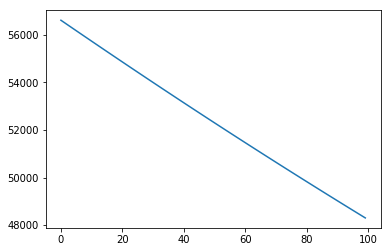

In [19]:
loss_record = []
iters = 100

for i in range(iters):
    _, iter_loss = sess.run([optimizer, loss], feed_dict = feed)
    loss_record.append(iter_loss)
    
plt.plot(loss_record)

That looks like healty model learning! Let's look at the current weights and biases:

In [20]:
print(sess.run([weights, bias])) ## Note, no feed dictionary!

[array([[-0.42885515]], dtype=float32), array([ 0.09961317], dtype=float32)]


How good are the predictions? Let's take a look:

In [21]:
working_data.insert(len(working_data.columns), 'avg_price_predict', sess.run(lin_reg, feed_dict = feed))
print(working_data)

    record_date  avg_price  avg_price_prior  avg_price_predict
1    2015-04-02       5.75             5.71          -2.349150
2    2015-04-03       5.24             5.75          -2.366304
3    2015-04-04       5.74             5.24          -2.147588
4    2015-04-05       5.74             5.74          -2.362015
5    2015-04-06       5.64             5.74          -2.362015
6    2015-04-07       5.66             5.64          -2.319130
7    2015-04-08       5.64             5.66          -2.327707
8    2015-04-09       5.72             5.64          -2.319130
9    2015-04-10       5.48             5.72          -2.353438
10   2015-04-11       5.60             5.48          -2.250513
11   2015-04-12       5.51             5.60          -2.301976
12   2015-04-13       5.50             5.51          -2.263379
13   2015-04-14       5.49             5.50          -2.259090
14   2015-04-15       5.47             5.49          -2.254802
15   2015-04-16       5.46             5.47          -2

Wow, that's pretty lousy, but maybe more learning will help?

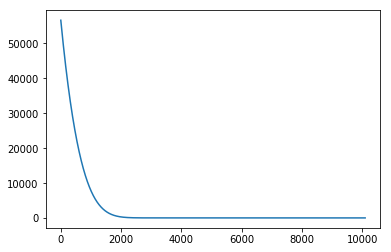

In [22]:
iters = 10000

for i in range(iters):
    _, iter_loss = sess.run([optimizer, loss], feed_dict = feed)
    loss_record.append(iter_loss)
    
plt.plot(loss_record)

In [23]:
working_data['avg_price_predict'] = sess.run(lin_reg, feed_dict = feed)
print(working_data)

    record_date  avg_price  avg_price_prior  avg_price_predict
1    2015-04-02       5.75             5.71           5.600407
2    2015-04-03       5.24             5.75           5.632652
3    2015-04-04       5.74             5.24           5.221525
4    2015-04-05       5.74             5.74           5.624590
5    2015-04-06       5.64             5.74           5.624590
6    2015-04-07       5.66             5.64           5.543977
7    2015-04-08       5.64             5.66           5.560100
8    2015-04-09       5.72             5.64           5.543977
9    2015-04-10       5.48             5.72           5.608468
10   2015-04-11       5.60             5.48           5.414997
11   2015-04-12       5.51             5.60           5.511732
12   2015-04-13       5.50             5.51           5.439180
13   2015-04-14       5.49             5.50           5.431119
14   2015-04-15       5.47             5.49           5.423058
15   2015-04-16       5.46             5.47           5

Significantly better!

In [24]:
def tf_sig(inp):
    return tf.divide(1., tf.add(1., tf.exp(tf.negative(inp))))

In [25]:
sig = tf.divide(1., tf.add(1., tf.exp(tf.negative(lin_reg))))
sess.run(sig, feed_dict = feed)

array([[ 0.99631727],
       [ 0.99643373],
       [ 0.99462986],
       [ 0.99640501],
       [ 0.99640501],
       [ 0.99610436],
       [ 0.99616635],
       [ 0.99610436],
       [ 0.99634677],
       [ 0.99557036],
       [ 0.99597722],
       [ 0.99567574],
       [ 0.99564087],
       [ 0.99560577],
       [ 0.99553466],
       [ 0.9954986 ],
       [ 0.99564087],
       [ 0.99553466],
       [ 0.99597722],
       [ 0.99394387],
       [ 0.99508333],
       [ 0.99349111],
       [ 0.99467283],
       [ 0.99488223],
       [ 0.99354303],
       [ 0.99445492],
       [ 0.99523866],
       [ 0.99374664],
       [ 0.99349111],
       [ 0.99441022],
       [ 0.99374664],
       [ 0.99343878],
       [ 0.99354303],
       [ 0.99343878],
       [ 0.99338597],
       [ 0.98905712],
       [ 0.98931587],
       [ 0.98931587],
       [ 0.99294853],
       [ 0.99294853],
       [ 0.99349111],
       [ 0.99349111],
       [ 0.99399215],
       [ 0.99159169],
       [ 0.99236113],
       [ 0

### Neural Networks
The linear regression serves as the building block for neural networks. A few key points:

1. tf.matmul() will be your main operation, remember that you are doing a matrix multiply across an entire layer, not node-by-node.
2. The number of columns in the weights, and the number of biases will be equal to that layer’s number of nodes, usually greater than 1.
3. After doing tf.matmul() [weights] and tf.add() [bias], you can then apply an activation function, depending on what kind of layer you want. tf.tanh() is a good one to start with.
4. Make sure that the final layer’s activation matches the data you’re working with! Sigmoid for dummy labels, linear (no activation) for continuous labels.

Let's start by creating a simple feed-forward network:

In [26]:
nn_layer_1_weights = tf.Variable(tf.random_normal(shape = (len(feature_cols), 4)))
nn_layer_1_bias = tf.Variable(tf.zeros(shape = (4,)))

nn_layer_2_weights = tf.Variable(tf.random_normal(shape = (4, 3)))
nn_layer_2_bias = tf.Variable(tf.zeros(shape = (3,)))

nn_layer_3_weights = tf.Variable(tf.random_normal(shape = (3, 1)))
nn_layer_3_bias = tf.Variable(tf.zeros(shape = (1,)))

In [27]:
nn_graph_layer_1 = tf_sig(tf.add(tf.matmul(input_ph, nn_layer_1_weights), nn_layer_1_bias))
nn_graph_layer_2 = tf.add(tf.matmul(nn_graph_layer_1, nn_layer_2_weights), nn_layer_2_bias)
nn_graph_layer_3 = tf.add(tf.matmul(nn_graph_layer_2, nn_layer_3_weights), nn_layer_3_bias)

In [28]:
sess.run(tf.global_variables_initializer())

In [29]:
sess.run(nn_graph_layer_3, feed_dict = feed)

array([[-2.54629421],
       [-2.55099916],
       [-2.48775244],
       [-2.54982686],
       [-2.54982686],
       [-2.53795958],
       [-2.54035401],
       [-2.53795958],
       [-2.54747391],
       [-2.51841474],
       [-2.53313828],
       [-2.52213287],
       [-2.5208962 ],
       [-2.51965666],
       [-2.51716995],
       [-2.51592207],
       [-2.5208962 ],
       [-2.51716995],
       [-2.53313828],
       [-2.46772289],
       [-2.50201201],
       [-2.455369  ],
       [-2.4890635 ],
       [-2.49557471],
       [-2.45675421],
       [-2.4824779 ],
       [-2.50711012],
       [-2.46226382],
       [-2.455369  ],
       [-2.48115206],
       [-2.46226382],
       [-2.45398021],
       [-2.45675421],
       [-2.45398021],
       [-2.45258856],
       [-2.3577795 ],
       [-2.36264038],
       [-2.36264038],
       [-2.44133472],
       [-2.44133472],
       [-2.455369  ],
       [-2.455369  ],
       [-2.46907949],
       [-2.40926242],
       [-2.42696595],
       [-2

In [30]:
loss = tf.reduce_sum(tf.square(tf.subtract(label_ph, nn_graph_layer_3)))

In [31]:
learn_rate = 1e-3
optimizer = tf.train.AdamOptimizer(learn_rate).minimize(loss)

In [33]:
feed = {
    input_ph: working_data[feature_cols].values,
    label_ph: working_data[label_cols].values
}

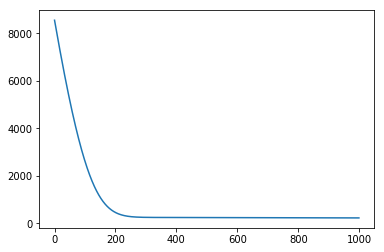

In [35]:
loss_record = []
iters = 1000
sess.run(tf.global_variables_initializer())

for i in range(iters):
    _, iter_loss = sess.run([optimizer, loss], feed_dict = feed)
    loss_record.append(iter_loss)
    
plt.plot(loss_record)

In [34]:
sess.run(nn_graph_layer_3, feed_dict = feed)

array([[ 5.1987648 ],
       [ 5.20336819],
       [ 5.1437273 ],
       [ 5.20221901],
       [ 5.20221901],
       [ 5.1906786 ],
       [ 5.19299316],
       [ 5.1906786 ],
       [ 5.19991684],
       [ 5.17205048],
       [ 5.18604088],
       [ 5.17555857],
       [ 5.17438984],
       [ 5.17322063],
       [ 5.17087889],
       [ 5.1697073 ],
       [ 5.17438984],
       [ 5.17087889],
       [ 5.18604088],
       [ 5.12579298],
       [ 5.15676498],
       [ 5.11494732],
       [ 5.14491653],
       [ 5.15085125],
       [ 5.11615515],
       [ 5.13896275],
       [ 5.16148281],
       [ 5.12098026],
       [ 5.11494732],
       [ 5.1377697 ],
       [ 5.12098026],
       [ 5.11373758],
       [ 5.11615515],
       [ 5.11373758],
       [ 5.11252785],
       [ 5.03465462],
       [ 5.03843737],
       [ 5.03843737],
       [ 5.10281849],
       [ 5.10281849],
       [ 5.11494732],
       [ 5.11494732],
       [ 5.12699509],
       [ 5.07585239],
       [ 5.09061003],
       [ 5